In [12]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ch = pd.read_csv('china_clean.csv')

In [4]:
ch.head(10)

,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Duration,N_effort,Effort
0,1587.0,774.0,260.0,340.0,128.0,0.0,1502.0,0.0,0.0,4.7,5.0,4.7,5.0,4.0,4.0,7490.0,7490.0
1,260.0,9.0,4.0,3.0,193.0,41.0,51.0,138.0,61.0,16.0,16.6,16.0,16.6,2.0,17.0,4150.0,4150.0
2,152.0,25.0,33.0,28.0,42.0,35.0,163.0,0.0,0.0,4.4,4.1,4.4,4.1,1.0,9.0,668.0,668.0
3,252.0,151.0,28.0,8.0,39.0,0.0,69.0,153.0,4.0,12.8,14.3,15.5,17.3,1.0,4.0,3901.0,3238.0
4,292.0,93.0,0.0,194.0,20.0,0.0,0.0,307.0,0.0,10.3,9.8,12.4,11.7,1.0,13.0,3607.0,2994.0
5,83.0,63.0,0.0,24.0,0.0,0.0,0.0,87.0,0.0,16.1,15.3,19.3,18.5,1.0,4.0,1606.0,1333.0
6,79.0,24.0,0.0,23.0,30.0,0.0,0.0,77.0,0.0,20.3,20.9,24.5,25.1,1.0,6.0,1936.0,1607.0
7,97.0,0.0,108.0,7.0,0.0,5.0,120.0,0.0,0.0,11.9,9.7,11.9,9.7,2.0,7.0,1158.0,1158.0
8,116.0,0.0,23.0,58.0,14.0,20.0,81.0,34.0,0.0,10.7,10.8,12.9,13.0,1.0,6.0,1498.0,1243.0
9,52.0,39.0,7.0,0.0,0.0,0.0,0.0,46.0,0.0,64.8,73.3,78.1,88.3,1.0,7.0,4063.0,3372.0


In [6]:
ch.shape

(499, 17)

In [7]:
ch.columns

Index(['AFP', 'Input', 'Output', 'Enquiry', 'File', 'Interface', 'Added',
       'Changed', 'Deleted', 'PDR_AFP', 'PDR_UFP', 'NPDR_AFP', 'NPDU_UFP',
       'Resource', 'Duration', 'N_effort', 'Effort'],
      dtype='object')

In [8]:
# number of unique values for each variable
ch.nunique(axis=0)

AFP          351
Input        236
Output       205
Enquiry      162
File         150
Interface     70
Added        307
Changed      163
Deleted       43
PDR_AFP      228
PDR_UFP      227
NPDR_AFP     236
NPDU_UFP     239
Resource       4
Duration      39
N_effort     481
Effort       483
dtype: int64

In [10]:
ch.describe()

,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Duration,N_effort,Effort
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.00000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,486.857715,167.098196,113.601202,61.601202,91.234469,24.234469,360.354709,85.062124,12.352705,11.770541,12.07976,13.269739,13.626253,1.458918,8.719238,4277.641283,3921.048096
std,1059.171436,486.338575,221.274374,105.422840,210.270984,85.040996,829.842333,290.857039,124.224130,12.105649,12.81871,14.009840,14.843416,0.823729,7.347058,7071.248036,6480.855600
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.30000,0.400000,0.400000,1.000000,1.000000,31.000000,26.000000
25%,100.500000,27.000000,13.000000,6.000000,14.000000,0.000000,38.000000,0.000000,0.000000,4.300000,4.20000,4.600000,4.400000,1.000000,4.000000,776.000000,703.500000
50%,215.000000,63.000000,42.000000,24.000000,36.000000,0.000000,135.000000,4.000000,0.000000,8.100000,8.00000,8.800000,8.900000,1.000000,7.000000,2098.000000,1829.000000
75%,437.500000,152.500000,112.000000,68.500000,84.000000,20.000000,325.500000,87.000000,0.000000,15.400000,15.75000,16.350000,16.900000,2.000000,11.000000,4192.000000,3826.500000
max,17518.000000,9404.000000,2455.000000,952.000000,2955.000000,1572.000000,13580.000000,5193.000000,2657.000000,83.800000,96.60000,101.000000,108.300000,4.000000,84.000000,54620.000000,54620.000000


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

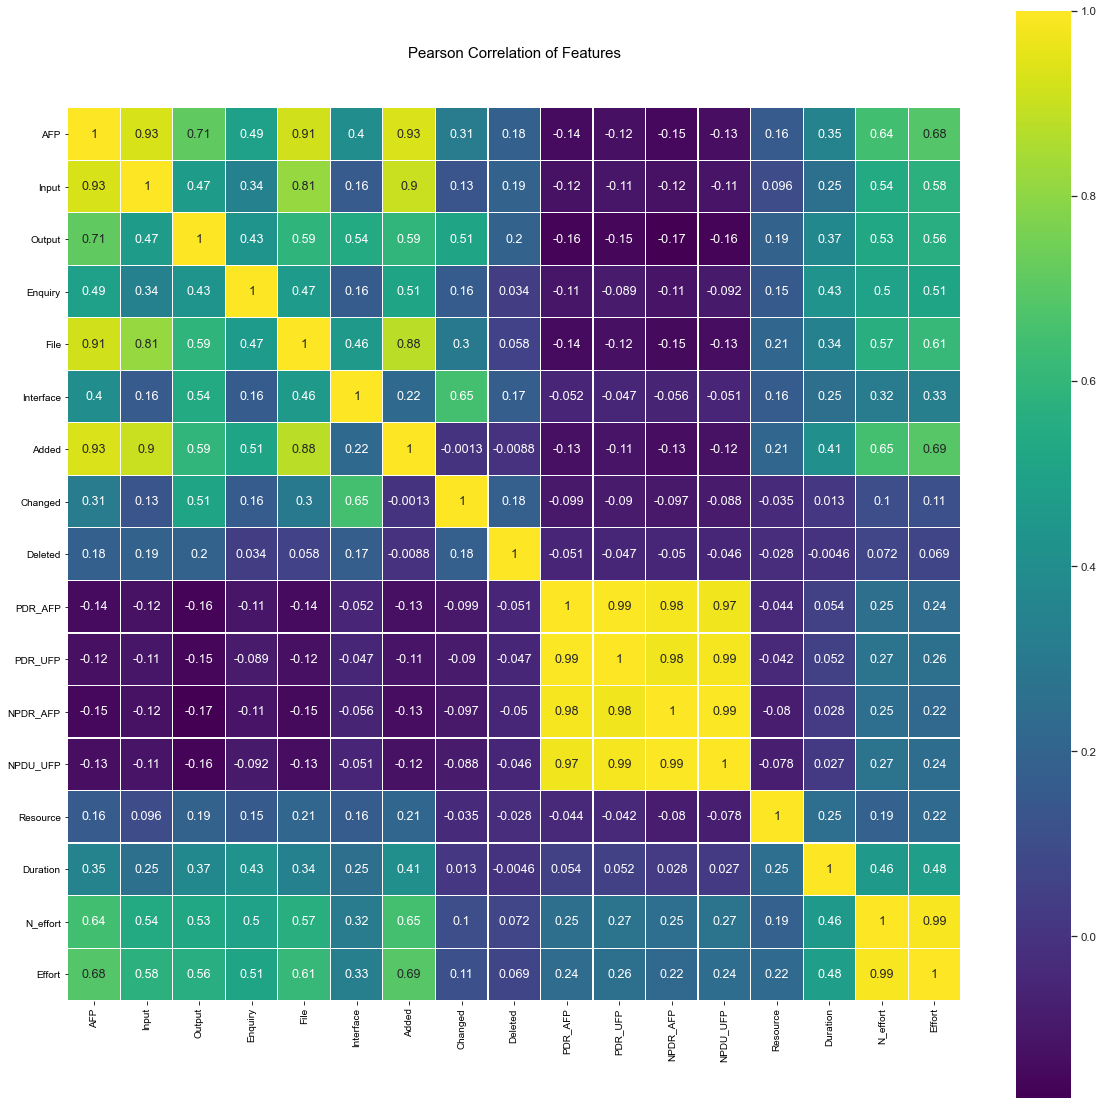

In [14]:
# calculate correlation matrix
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(ch.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

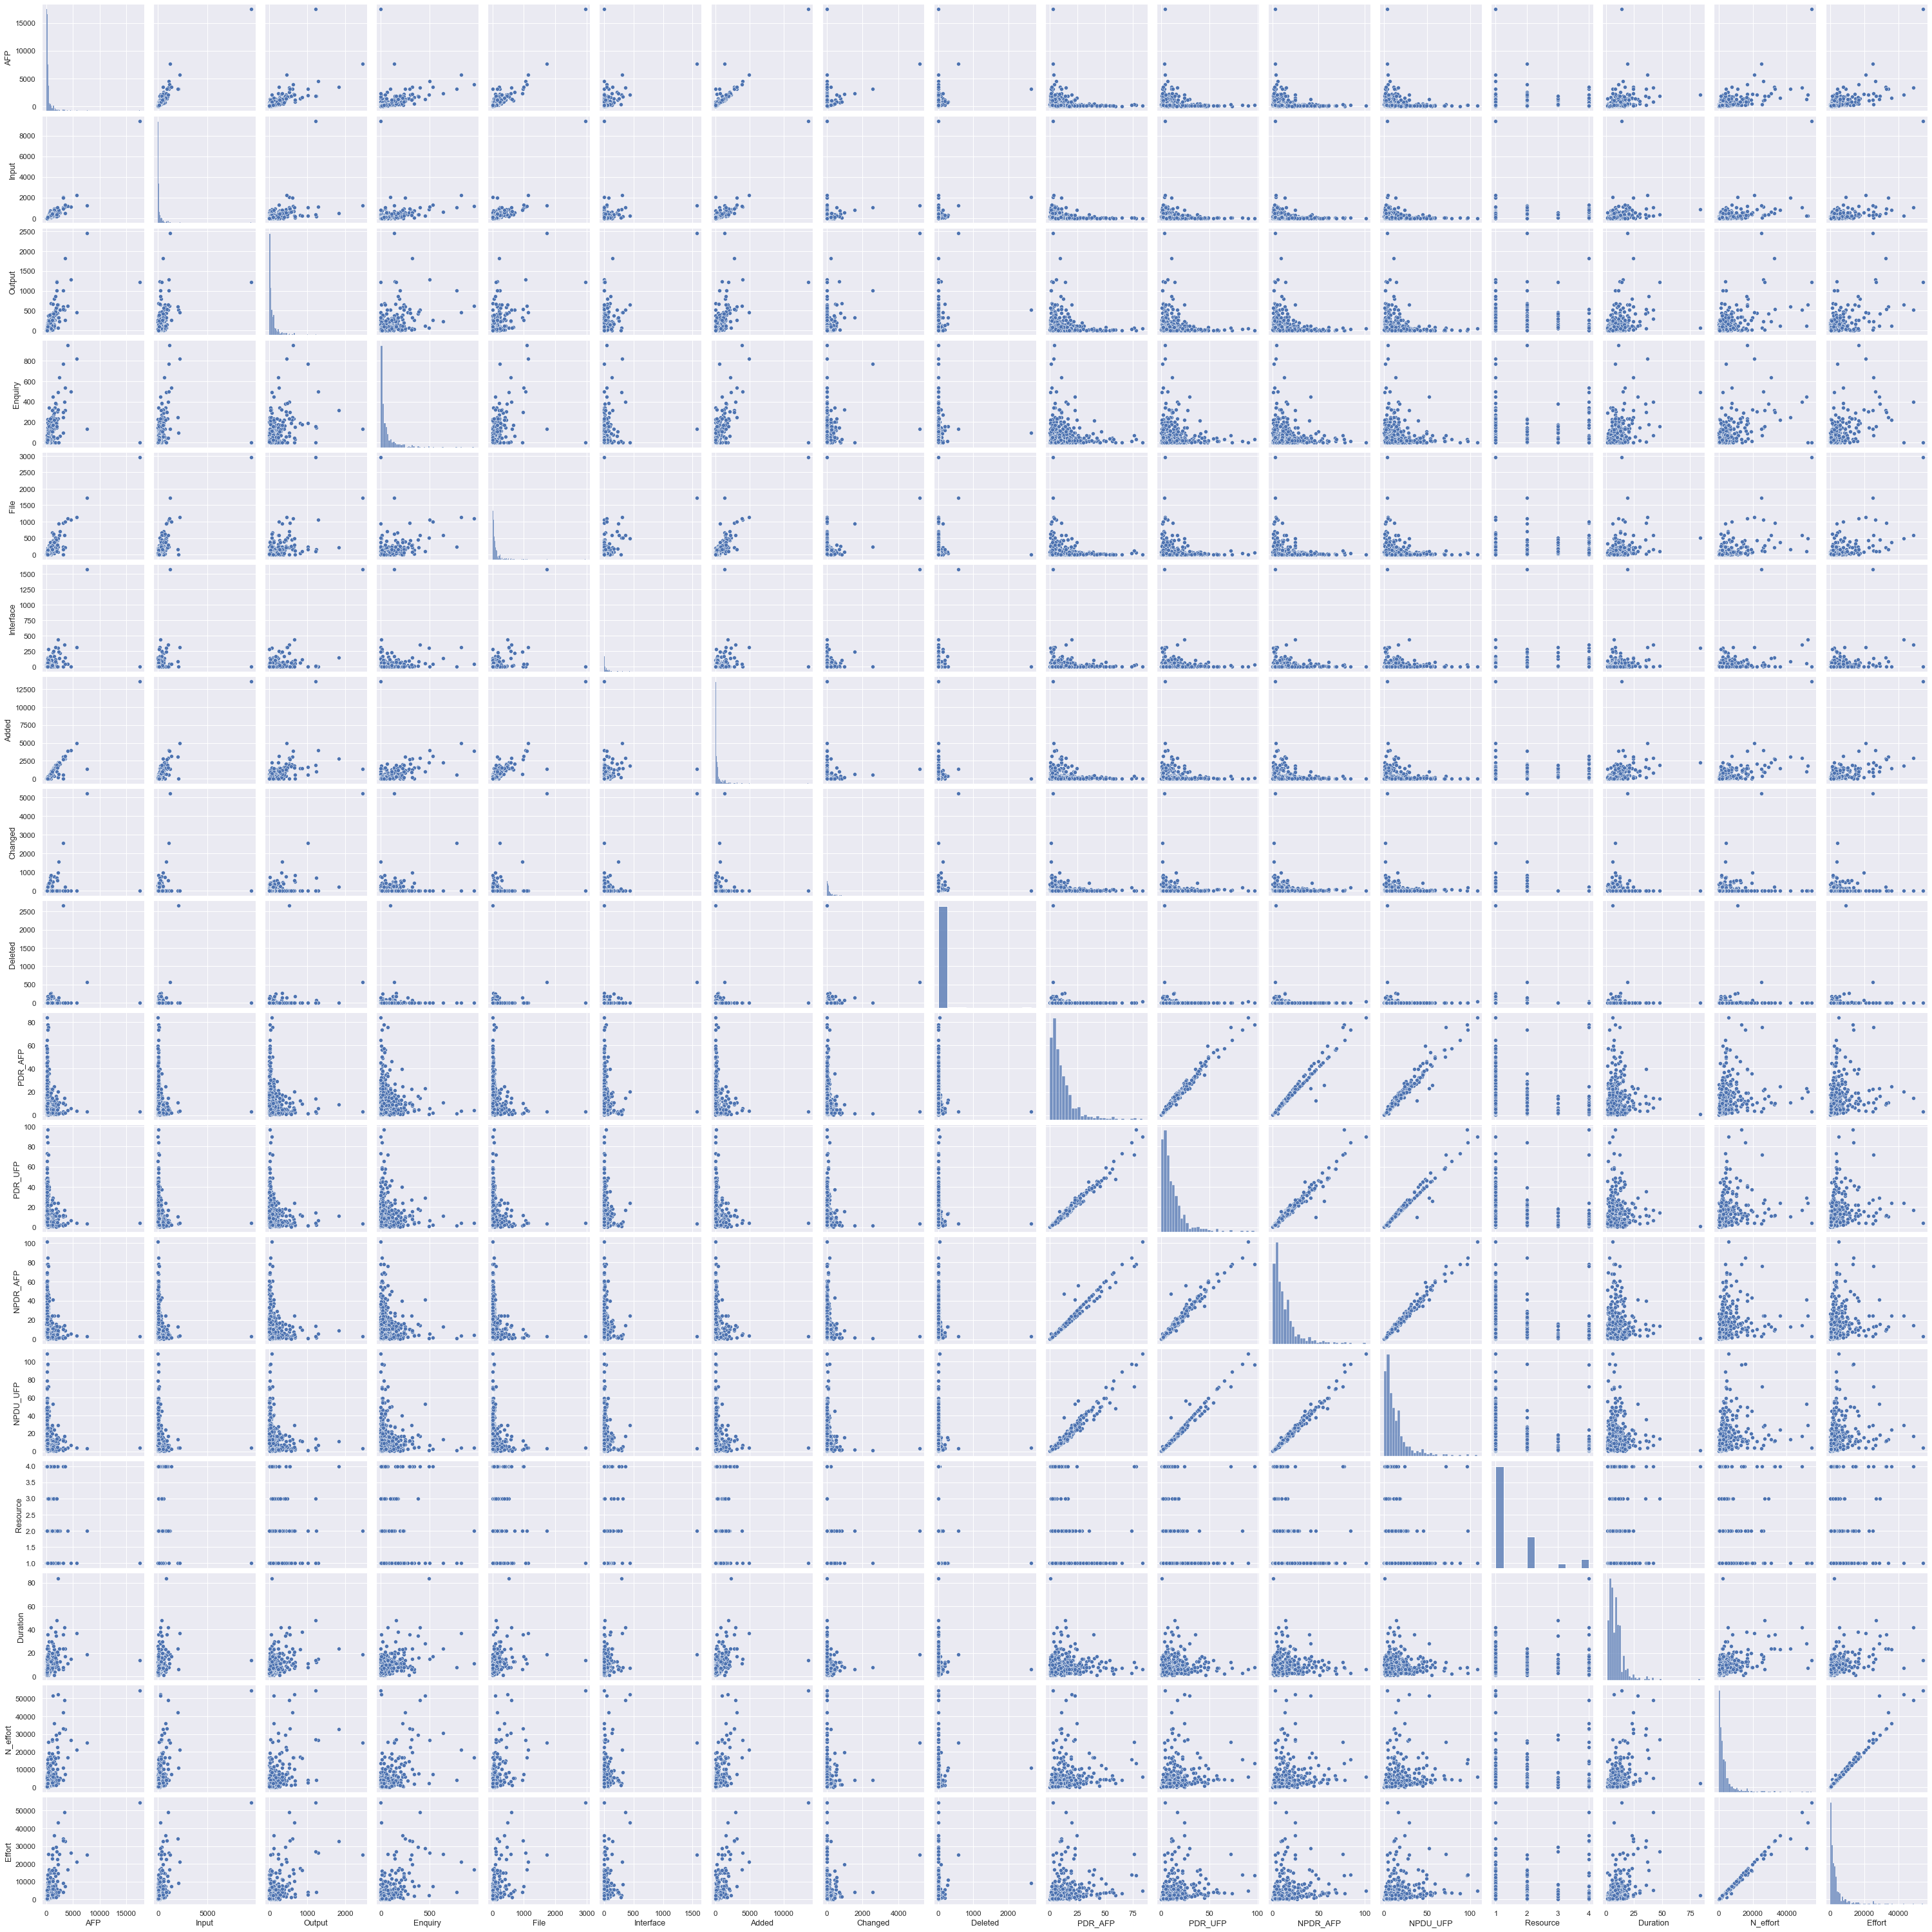

In [15]:
sns.pairplot(ch)

In [21]:
# mutual info regression for feature selection
from sklearn.feature_selection import mutual_info_regression

X = ch.drop(['Effort', 'N_effort'], axis = 1)
y = ch['Effort']

mutual_info = mutual_info_regression(X, y)
mutual_info

array([0.28932431, 0.1943448 , 0.09326357, 0.19535234, 0.14121656,
       0.01296778, 0.21698631, 0.08897744, 0.01669974, 0.23910789,
       0.21197127, 0.19134861, 0.22023207, 0.03532973, 0.16727385])

In [22]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

AFP          0.289324
PDR_AFP      0.239108
NPDU_UFP     0.220232
Added        0.216986
PDR_UFP      0.211971
Enquiry      0.195352
Input        0.194345
NPDR_AFP     0.191349
Duration     0.167274
File         0.141217
Output       0.093264
Changed      0.088977
Resource     0.035330
Deleted      0.016700
Interface    0.012968
dtype: float64

<AxesSubplot:>

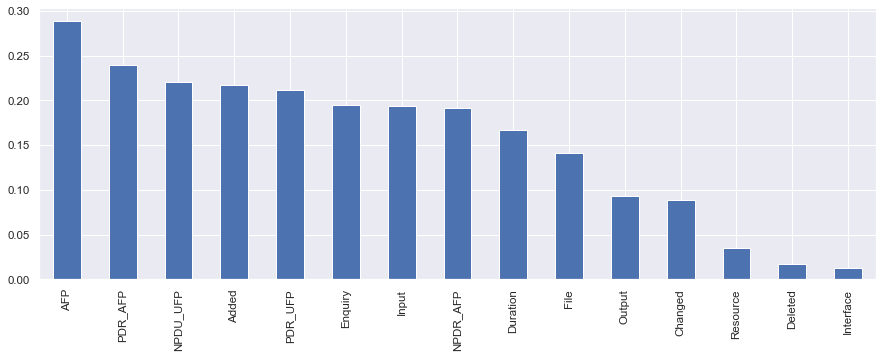

In [23]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [28]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=40)
selected_top_columns.fit(X, y)
X.columns[selected_top_columns.get_support()]

Index(['AFP', 'Enquiry', 'Added', 'PDR_AFP', 'PDR_UFP', 'NPDU_UFP'], dtype='object')

In [29]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [37]:
corr_features = correlation(X, 0.70)
len(set(corr_features))

7

In [38]:
corr_features

{'Added', 'File', 'Input', 'NPDR_AFP', 'NPDU_UFP', 'Output', 'PDR_UFP'}

In [39]:
pd.pivot_table(ch, index = ['Added', 'File', 'Input', 'NPDR_AFP', 'NPDU_UFP', 'Output', 'PDR_UFP'], values = 'Effort').sort_values('Effort', ascending = False)

,,,,,,,Effort
Added,File,Input,NPDR_AFP,NPDU_UFP,Output,PDR_UFP,
13580.0,2955.0,9404.0,3.1,4.0,1221.0,4.0,54620.0
2922.0,595.0,1049.0,14.7,16.8,519.0,16.8,49034.0
1801.0,485.0,219.0,24.3,29.0,657.0,24.0,43303.0
1493.0,371.0,780.0,24.6,24.1,119.0,24.1,36046.0
3113.0,157.0,2019.0,13.5,13.5,609.0,10.9,34085.0
...,...,...,...,...,...,...,...
0.0,77.0,168.0,0.4,0.4,10.0,0.3,117.0
11.0,14.0,25.0,2.9,2.7,0.0,2.7,114.0
25.0,21.0,18.0,1.3,1.4,4.0,1.1,89.0
